In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.7.0'

In [ ]:
import os
import numpy as np
import random
os.environ['TF_DETERMINISTIC_OPS'] ='1'
os.environ['TF_CUDNN_DETERMINISTIC']='1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
SEED=1
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=(3,3),
    input_shape=(32, 32,3),activation='relu',
    padding='same'))
  model.add(Conv2D(filters=32,kernel_size=(3,3),
       activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=64,kernel_size=(3,3),
      activation='relu',padding='same'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), 
      activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), 
      activation='relu', padding='same'))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), 
      activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = create_model()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

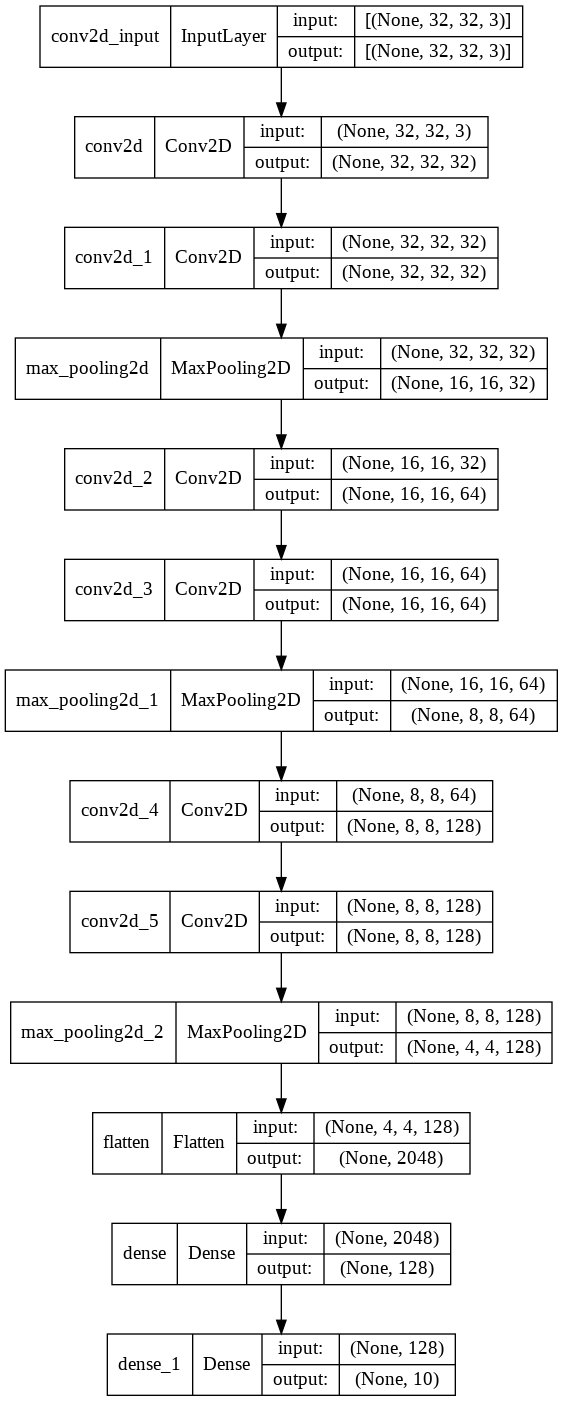

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(
    loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=30,verbose=2)       

Epoch 1/30
200/200 - 12s - loss: 1.7087 - acc: 0.3734 - val_loss: 1.4240 - val_acc: 0.4817 - 12s/epoch - 60ms/step
Epoch 2/30
200/200 - 3s - loss: 1.2857 - acc: 0.5360 - val_loss: 1.1275 - val_acc: 0.5994 - 3s/epoch - 15ms/step
Epoch 3/30
200/200 - 3s - loss: 1.0586 - acc: 0.6263 - val_loss: 0.9971 - val_acc: 0.6479 - 3s/epoch - 15ms/step
Epoch 4/30
200/200 - 3s - loss: 0.8857 - acc: 0.6876 - val_loss: 0.8956 - val_acc: 0.6876 - 3s/epoch - 14ms/step
Epoch 5/30
200/200 - 3s - loss: 0.7808 - acc: 0.7269 - val_loss: 0.7899 - val_acc: 0.7268 - 3s/epoch - 15ms/step
Epoch 6/30
200/200 - 3s - loss: 0.6932 - acc: 0.7574 - val_loss: 0.7787 - val_acc: 0.7353 - 3s/epoch - 15ms/step
Epoch 7/30
200/200 - 3s - loss: 0.6077 - acc: 0.7875 - val_loss: 0.7471 - val_acc: 0.7458 - 3s/epoch - 15ms/step
Epoch 8/30
200/200 - 3s - loss: 0.5293 - acc: 0.8155 - val_loss: 0.7386 - val_acc: 0.7495 - 3s/epoch - 15ms/step
Epoch 9/30
200/200 - 3s - loss: 0.4725 - acc: 0.8333 - val_loss: 0.7333 - val_acc: 0.7541 - 3s

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

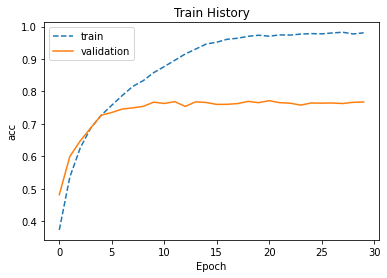

In [ ]:
show_train_history(train_history,'acc','val_acc')

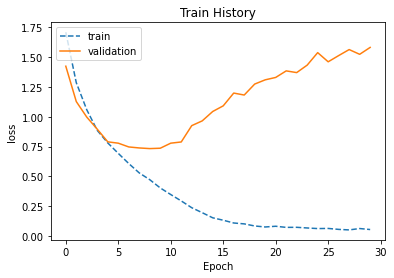

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 1.6446 - acc: 0.7603 - 1s/epoch - 4ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 1.644574761390686 test_acc= 0.7602999806404114


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 8, 1, ..., 5, 1, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={
    0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
    5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

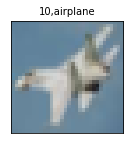

In [ ]:
plot_images_labels_prediction(
    x_test_image,y_test_label,[],idx=10,num=1)

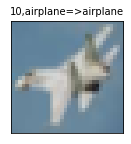

In [ ]:
plot_images_labels_prediction(
    x_test_image,y_test_label,prediction,idx=10,num=1)

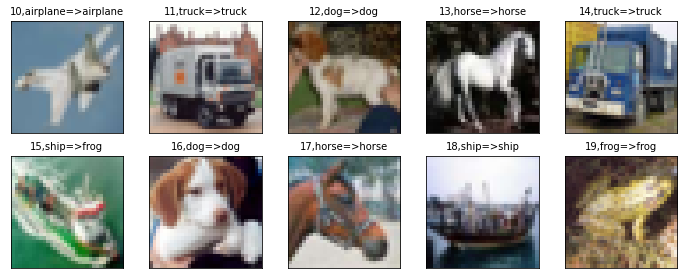

In [ ]:
plot_images_labels_prediction(
    x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
  images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

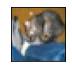

label: cat
predict: cat
airplane   Probability:0.000002737
automobile Probability:0.000000000
bird       Probability:0.000000000
cat        Probability:0.973247707
deer       Probability:0.000000000
dog        Probability:0.026748097
frog       Probability:0.000001349
horse      Probability:0.000000000
ship       Probability:0.000000008
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(
  x_test_image,y_test_label,prediction,probability,0) 

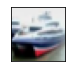

label: ship
predict: ship
airplane   Probability:0.000000010
automobile Probability:0.004237563
bird       Probability:0.000000000
cat        Probability:0.000000000
deer       Probability:0.000000000
dog        Probability:0.000000000
frog       Probability:0.000000000
horse      Probability:0.000000000
ship       Probability:0.995762408
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(
    index=y_test_label,columns=prediction,
    rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,786,16,30,19,21,8,6,13,49,52
1,13,876,0,4,4,3,5,5,16,74
2,63,8,625,64,96,35,52,37,11,9
3,25,11,66,551,69,153,53,41,6,25
4,8,4,45,40,764,31,27,71,4,6
5,8,4,52,159,42,645,16,58,6,10
6,8,6,30,62,43,20,799,14,9,9
7,13,6,25,35,46,38,7,816,1,13
8,43,25,8,5,7,4,6,5,862,35


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[786,  16,  30,  19,  21,   8,   6,  13,  49,  52],
       [ 13, 876,   0,   4,   4,   3,   5,   5,  16,  74],
       [ 63,   8, 625,  64,  96,  35,  52,  37,  11,   9],
       [ 25,  11,  66, 551,  69, 153,  53,  41,   6,  25],
       [  8,   4,  45,  40, 764,  31,  27,  71,   4,   6],
       [  8,   4,  52, 159,  42, 645,  16,  58,   6,  10],
       [  8,   6,  30,  62,  43,  20, 799,  14,   9,   9],
       [ 13,   6,  25,  35,  46,  38,   7, 816,   1,  13],
       [ 43,  25,   8,   5,   7,   4,   6,   5, 862,  35],
       [ 16,  56,   6,   9,   3,   5,   3,   7,  16, 879]])

In [ ]:
cm_mat.sum(axis=0)

array([ 983, 1012,  887,  948, 1095,  942,  974, 1067,  980, 1112])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm 

array([[0.786, 0.016, 0.03 , 0.019, 0.021, 0.008, 0.006, 0.013, 0.049,
        0.052],
       [0.013, 0.876, 0.   , 0.004, 0.004, 0.003, 0.005, 0.005, 0.016,
        0.074],
       [0.063, 0.008, 0.625, 0.064, 0.096, 0.035, 0.052, 0.037, 0.011,
        0.009],
       [0.025, 0.011, 0.066, 0.551, 0.069, 0.153, 0.053, 0.041, 0.006,
        0.025],
       [0.008, 0.004, 0.045, 0.04 , 0.764, 0.031, 0.027, 0.071, 0.004,
        0.006],
       [0.008, 0.004, 0.052, 0.159, 0.042, 0.645, 0.016, 0.058, 0.006,
        0.01 ],
       [0.008, 0.006, 0.03 , 0.062, 0.043, 0.02 , 0.799, 0.014, 0.009,
        0.009],
       [0.013, 0.006, 0.025, 0.035, 0.046, 0.038, 0.007, 0.816, 0.001,
        0.013],
       [0.043, 0.025, 0.008, 0.005, 0.007, 0.004, 0.006, 0.005, 0.862,
        0.035],
       [0.016, 0.056, 0.006, 0.009, 0.003, 0.005, 0.003, 0.007, 0.016,
        0.879]])

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.786,0.016,0.030,0.019,0.021,0.008,0.006,0.013,0.049,0.052
automobile,0.013,0.876,0.000,0.004,0.004,0.003,0.005,0.005,0.016,0.074
bird,0.063,0.008,0.625,0.064,0.096,0.035,0.052,0.037,0.011,0.009
cat,0.025,0.011,0.066,0.551,0.069,0.153,0.053,0.041,0.006,0.025
deer,0.008,0.004,0.045,0.040,0.764,0.031,0.027,0.071,0.004,0.006
dog,0.008,0.004,0.052,0.159,0.042,0.645,0.016,0.058,0.006,0.010
frog,0.008,0.006,0.030,0.062,0.043,0.020,0.799,0.014,0.009,0.009
horse,0.013,0.006,0.025,0.035,0.046,0.038,0.007,0.816,0.001,0.013
ship,0.043,0.025,0.008,0.005,0.007,0.004,0.006,0.005,0.862,0.035
truck,0.016,0.056,0.006,0.009,0.003,0.005,0.003,0.007,0.016,0.879


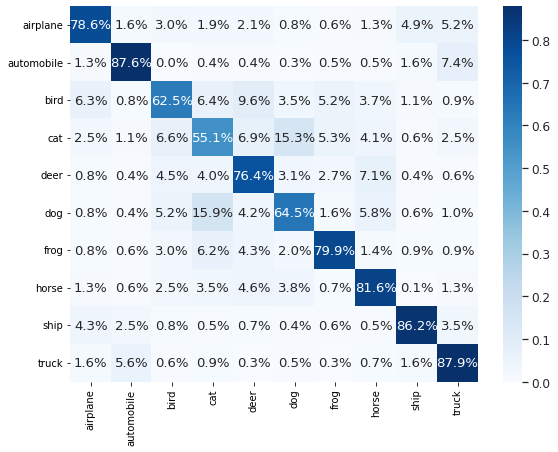

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

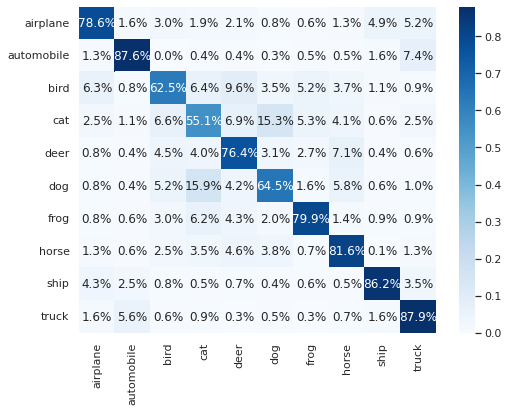

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,1
3,0,0
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
158,5,3
239,5,3
262,5,3
321,5,3
525,5,3
...,...,...
9654,5,3
9657,5,3
9774,5,3
9823,5,3


# 查看預測錯誤資料

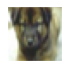

label: dog
predict: dog
airplane   Probability:0.000000000
automobile Probability:0.000000004
bird       Probability:0.000134134
cat        Probability:0.325037867
deer       Probability:0.000215160
dog        Probability:0.674113572
frog       Probability:0.000499287
horse      Probability:0.000000000
ship       Probability:0.000000017
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,33)

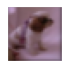

label: dog
predict: dog
airplane   Probability:0.000000000
automobile Probability:0.000000001
bird       Probability:0.000024446
cat        Probability:0.005357628
deer       Probability:0.000000032
dog        Probability:0.994609833
frog       Probability:0.000007600
horse      Probability:0.000000490
ship       Probability:0.000000000
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,178)